In [198]:
import pandas as pd
!pip install numpy torch
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [199]:
df = pd.read_csv(r"C:\Users\adane\OneDrive\Documents\Github projects\child_mortality.csv")

In [200]:
df

,REF_AREA,Geographic area,INDICATOR,Indicator,SEX,Sex,WEALTH_QUINTILE,Wealth Quintile,SERIES_NAME,Series Name,...,DEFINITION,INTERVAL,SERIES_METHOD,Series Method,LOWER_BOUND,UPPER_BOUND,STATUS,YEAR_TO_ACHIEVE,MODEL,Model Used
0,HND,Honduras,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,193.912554,279.264320,NaN,NaN,B3,B3
1,HND,Honduras,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,192.011489,266.002070,NaN,NaN,B3,B3
2,HND,Honduras,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,189.600532,253.240292,NaN,NaN,B3,B3
3,HND,Honduras,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,187.058788,241.950340,NaN,NaN,B3,B3
4,HND,Honduras,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,183.871562,231.152129,NaN,NaN,B3,B3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,HND,Honduras,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,14.266308,22.696897,NaN,NaN,B3,B3
64,HND,Honduras,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,13.447449,22.399265,NaN,NaN,B3,B3
65,HND,Honduras,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,12.652911,22.136362,NaN,NaN,B3,B3
66,HND,Honduras,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,11.915986,22.053455,NaN,NaN,B3,B3


In [201]:
df.drop(columns=[
     'Geographic area', 'Indicator', 'REGIONAL_GROUP', 'Regional group',
    'COUNTRY_NOTES', 'CONNECTION', 'DEATH_CATEGORY', 'CATEGORY', 'SERIES_CATEGORY',
    'Series Category', 'SERIES_TYPE', 'Series Type', 'STD_ERR', 'AGE_GROUP_OF_WOMEN',
    'Age Group of Women', 'TIME_SINCE_FIRST_BIRTH', 'Time Since First Birth',
    'DEFINITION', 'SERIES_METHOD', 'Series Method', 'STATUS', 'YEAR_TO_ACHIEVE'
], inplace=True)

In [202]:
del df['INDICATOR']

In [203]:
df

,REF_AREA,SEX,Sex,WEALTH_QUINTILE,Wealth Quintile,SERIES_NAME,Series Name,SERIES_YEAR,Series Year,TIME_PERIOD,...,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of measure,REF_DATE,INTERVAL,LOWER_BOUND,UPPER_BOUND,MODEL,Model Used
0,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,1956-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1956.5,1,193.912554,279.264320,B3,B3
1,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,1957-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1957.5,1,192.011489,266.002070,B3,B3
2,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,1958-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1958.5,1,189.600532,253.240292,B3,B3
3,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,1959-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1959.5,1,187.058788,241.950340,B3,B3
4,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,1960-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1960.5,1,183.871562,231.152129,B3,B3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,2019-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",2019.5,1,14.266308,22.696897,B3,B3
64,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,2020-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",2020.5,1,13.447449,22.399265,B3,B3
65,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,2021-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",2021.5,1,12.652911,22.136362,B3,B3
66,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,2022-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",2022.5,1,11.915986,22.053455,B3,B3


In [204]:
#check if there are any null values
df.isnull().sum()

REF_AREA              0
SEX                   0
Sex                   0
WEALTH_QUINTILE       0
Wealth Quintile       0
SERIES_NAME           0
Series Name           0
SERIES_YEAR           0
Series Year           0
TIME_PERIOD           0
OBS_VALUE             0
OBS_STATUS            0
Observation Status    0
UNIT_MEASURE          0
Unit of measure       0
REF_DATE              0
INTERVAL              0
LOWER_BOUND           0
UPPER_BOUND           0
MODEL                 0
Model Used            0
dtype: int64

In [205]:
df

,REF_AREA,SEX,Sex,WEALTH_QUINTILE,Wealth Quintile,SERIES_NAME,Series Name,SERIES_YEAR,Series Year,TIME_PERIOD,...,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of measure,REF_DATE,INTERVAL,LOWER_BOUND,UPPER_BOUND,MODEL,Model Used
0,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,1956-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1956.5,1,193.912554,279.264320,B3,B3
1,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,1957-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1957.5,1,192.011489,266.002070,B3,B3
2,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,1958-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1958.5,1,189.600532,253.240292,B3,B3
3,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,1959-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1959.5,1,187.058788,241.950340,B3,B3
4,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,1960-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1960.5,1,183.871562,231.152129,B3,B3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,2019-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",2019.5,1,14.266308,22.696897,B3,B3
64,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,2020-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",2020.5,1,13.447449,22.399265,B3,B3
65,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,2021-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",2021.5,1,12.652911,22.136362,B3,B3
66,HND,_T,Total,_T,Total,UN_IGME,UN IGME estimate,2023,2023,2022-06,...,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",2022.5,1,11.915986,22.053455,B3,B3


In [206]:
df.drop(columns=['Sex', 'Wealth Quintile', 'Series Name'], inplace = True)
df

,REF_AREA,SEX,WEALTH_QUINTILE,SERIES_NAME,SERIES_YEAR,Series Year,TIME_PERIOD,OBS_VALUE,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of measure,REF_DATE,INTERVAL,LOWER_BOUND,UPPER_BOUND,MODEL,Model Used
0,HND,_T,_T,UN_IGME,2023,2023,1956-06,235.893308,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1956.5,1,193.912554,279.264320,B3,B3
1,HND,_T,_T,UN_IGME,2023,2023,1957-06,228.374820,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1957.5,1,192.011489,266.002070,B3,B3
2,HND,_T,_T,UN_IGME,2023,2023,1958-06,220.869679,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1958.5,1,189.600532,253.240292,B3,B3
3,HND,_T,_T,UN_IGME,2023,2023,1959-06,213.728994,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1959.5,1,187.058788,241.950340,B3,B3
4,HND,_T,_T,UN_IGME,2023,2023,1960-06,206.872591,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",1960.5,1,183.871562,231.152129,B3,B3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,HND,_T,_T,UN_IGME,2023,2023,2019-06,17.764478,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",2019.5,1,14.266308,22.696897,B3,B3
64,HND,_T,_T,UN_IGME,2023,2023,2020-06,17.173488,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",2020.5,1,13.447449,22.399265,B3,B3
65,HND,_T,_T,UN_IGME,2023,2023,2021-06,16.594552,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",2021.5,1,12.652911,22.136362,B3,B3
66,HND,_T,_T,UN_IGME,2023,2023,2022-06,16.030530,A,Normal value,D_PER_1000_B,"Deaths per 1,000 live births",2022.5,1,11.915986,22.053455,B3,B3


In [207]:
df

df.drop(columns=['Observation Status', 'UNIT_MEASURE', 'Unit of measure'], inplace=True)

In [208]:
df

,REF_AREA,SEX,WEALTH_QUINTILE,SERIES_NAME,SERIES_YEAR,Series Year,TIME_PERIOD,OBS_VALUE,OBS_STATUS,REF_DATE,INTERVAL,LOWER_BOUND,UPPER_BOUND,MODEL,Model Used
0,HND,_T,_T,UN_IGME,2023,2023,1956-06,235.893308,A,1956.5,1,193.912554,279.264320,B3,B3
1,HND,_T,_T,UN_IGME,2023,2023,1957-06,228.374820,A,1957.5,1,192.011489,266.002070,B3,B3
2,HND,_T,_T,UN_IGME,2023,2023,1958-06,220.869679,A,1958.5,1,189.600532,253.240292,B3,B3
3,HND,_T,_T,UN_IGME,2023,2023,1959-06,213.728994,A,1959.5,1,187.058788,241.950340,B3,B3
4,HND,_T,_T,UN_IGME,2023,2023,1960-06,206.872591,A,1960.5,1,183.871562,231.152129,B3,B3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,HND,_T,_T,UN_IGME,2023,2023,2019-06,17.764478,A,2019.5,1,14.266308,22.696897,B3,B3
64,HND,_T,_T,UN_IGME,2023,2023,2020-06,17.173488,A,2020.5,1,13.447449,22.399265,B3,B3
65,HND,_T,_T,UN_IGME,2023,2023,2021-06,16.594552,A,2021.5,1,12.652911,22.136362,B3,B3
66,HND,_T,_T,UN_IGME,2023,2023,2022-06,16.030530,A,2022.5,1,11.915986,22.053455,B3,B3


In [209]:
#drop SERIES_NAME	SERIES_YEAR	Series Year	, OBS_STATUS, Model Used

df.drop(columns=['SERIES_NAME', 'SERIES_YEAR', 'Series Year', 'OBS_STATUS', 'Model Used'], inplace=True)

In [210]:
df

,REF_AREA,SEX,WEALTH_QUINTILE,TIME_PERIOD,OBS_VALUE,REF_DATE,INTERVAL,LOWER_BOUND,UPPER_BOUND,MODEL
0,HND,_T,_T,1956-06,235.893308,1956.5,1,193.912554,279.264320,B3
1,HND,_T,_T,1957-06,228.374820,1957.5,1,192.011489,266.002070,B3
2,HND,_T,_T,1958-06,220.869679,1958.5,1,189.600532,253.240292,B3
3,HND,_T,_T,1959-06,213.728994,1959.5,1,187.058788,241.950340,B3
4,HND,_T,_T,1960-06,206.872591,1960.5,1,183.871562,231.152129,B3
...,...,...,...,...,...,...,...,...,...,...
63,HND,_T,_T,2019-06,17.764478,2019.5,1,14.266308,22.696897,B3
64,HND,_T,_T,2020-06,17.173488,2020.5,1,13.447449,22.399265,B3
65,HND,_T,_T,2021-06,16.594552,2021.5,1,12.652911,22.136362,B3
66,HND,_T,_T,2022-06,16.030530,2022.5,1,11.915986,22.053455,B3


In [211]:
#convert REF_DATE to a tensor
#extract Ref_date as input feature X. The values are extracted as a NumPY array,
#which you can use as input features
df['REF_DATE'] = df['REF_DATE'].astype(float)


X = df['REF_DATE'].values


X_mean = X.mean()
X_std = X.std()
X_norm = (X - X_mean) / X_std

In [212]:
#Prepare target variable
df['OBS_VALUE'] = df['OBS_VALUE'].astype(float)
y = df['OBS_VALUE'].values

y_mean, y_std = y.mean(), y.std()
y = (y - y_mean) / y_std

In [213]:
#convert the NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X_norm, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

In [214]:
#define a linear regression model
# I want to predict mortality rate from year

import torch.nn as nn

class MortalityModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
        
    def forward(self, x):
        return self.linear(x)
    
model = MortalityModel()

In [215]:
#train
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
epochs = 1000

for epoch in range(epochs):
    model.train()
    
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    
    optimizer.zero_grad()
    loss.backward()
        
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 2.0558
Epoch 200/1000, Loss: 1.4095
Epoch 300/1000, Loss: 0.9765
Epoch 400/1000, Loss: 0.6863
Epoch 500/1000, Loss: 0.4919
Epoch 600/1000, Loss: 0.3617
Epoch 700/1000, Loss: 0.2744
Epoch 800/1000, Loss: 0.2159
Epoch 900/1000, Loss: 0.1767
Epoch 1000/1000, Loss: 0.1505


In [216]:
#evaluation

model.eval()

with torch.no_grad():
    y_pred_tensor = model(X_tensor)
    y_pred = y_pred_tensor.squeeze().numpy()

# Denormalize predictions
y_pred = y_pred * y_std + y_mean

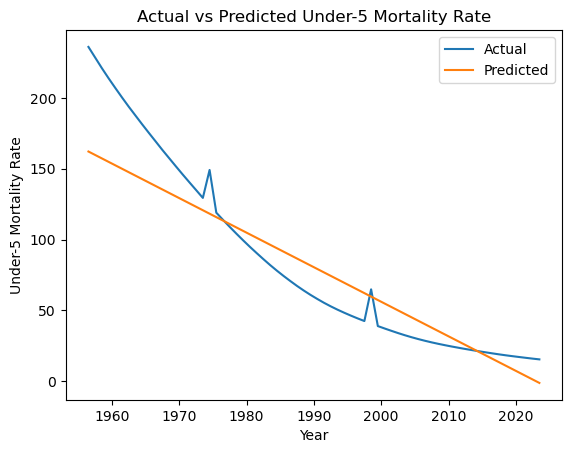

68 68
[162.11145 159.67545 157.23944 154.80344 152.36742]


In [217]:
#compare predicted values with actual values

plt.plot(df['REF_DATE'], df['OBS_VALUE'], label='Actual')
plt.plot(df['REF_DATE'], y_pred, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Under-5 Mortality Rate')
plt.title('Actual vs Predicted Under-5 Mortality Rate')
plt.legend()
plt.show()

print(len(df['REF_DATE']), len(y_pred))
print(y_pred[:5])  # check first few predicted values

In [218]:
print(torch.isnan(X_tensor).any())  # True means there are NaNs in X
print(torch.isinf(X_tensor).any())  # True means there are infinite values in X
print(X_tensor[:5])  # Look at the first 5 inputs

tensor(False)
tensor(False)
tensor([[-1.7068],
        [-1.6558],
        [-1.6049],
        [-1.5539],
        [-1.5030]])


In [224]:
#predict future


future_years = np.array([2024.5, 2025.5, 2026.5], dtype=np.float32).reshape(-1,1)
future_years_norm = (future_years - X_mean) / X_std
future_years_tensor = torch.tensor(future_years_norm)

with torch.no_grad():
    future_preds = model(future_years_tensor).squeeze().numpy()

print("Predicted mortality rates for future years:", future_preds)

Predicted mortality rates for future years: [-1.3538941 -1.3911146 -1.428335 ]


In [182]:
df


,REF_AREA,SEX,WEALTH_QUINTILE,TIME_PERIOD,OBS_VALUE,REF_DATE,INTERVAL,LOWER_BOUND,UPPER_BOUND,MODEL
0,HND,_T,_T,1956-06,235.893308,1956.5,1,193.912554,279.264320,B3
1,HND,_T,_T,1957-06,228.374820,1957.5,1,192.011489,266.002070,B3
2,HND,_T,_T,1958-06,220.869679,1958.5,1,189.600532,253.240292,B3
3,HND,_T,_T,1959-06,213.728994,1959.5,1,187.058788,241.950340,B3
4,HND,_T,_T,1960-06,206.872591,1960.5,1,183.871562,231.152129,B3
...,...,...,...,...,...,...,...,...,...,...
63,HND,_T,_T,2019-06,17.764478,2019.5,1,14.266308,22.696897,B3
64,HND,_T,_T,2020-06,17.173488,2020.5,1,13.447449,22.399265,B3
65,HND,_T,_T,2021-06,16.594552,2021.5,1,12.652911,22.136362,B3
66,HND,_T,_T,2022-06,16.030530,2022.5,1,11.915986,22.053455,B3


In [190]:
#check R^2 score

y_pred_denorm = y_pred.detach().numpy() * y_std + y_mean
y_actual = y * y_std + y_mean

r2 = r2_score(y_actual, y_pred_denorm)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9002


In [197]:
print("An R^2 of 0.9002 means about 90% of the variance in the dependent variable is explained by the model.")

An R^2 of 0.9002 means about 90% of the variance in the dependent variable is explained by the model.
